In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Seaborn

In [2]:
# datasets cargados de seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## DATASET: Penguins

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

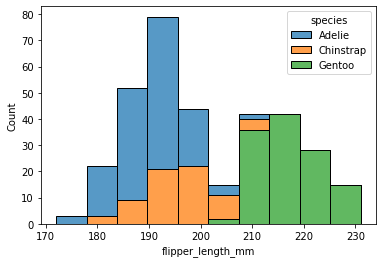

In [4]:
# Axes-level
# Histograma de mm de aleta x especies con barras apiladas
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

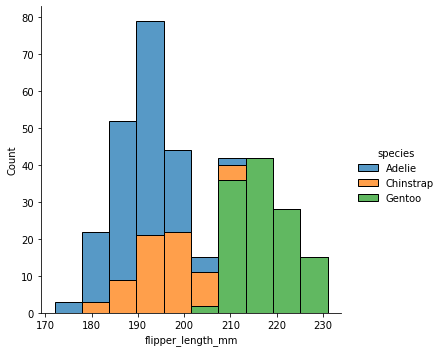

In [5]:
# Figure-level
sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

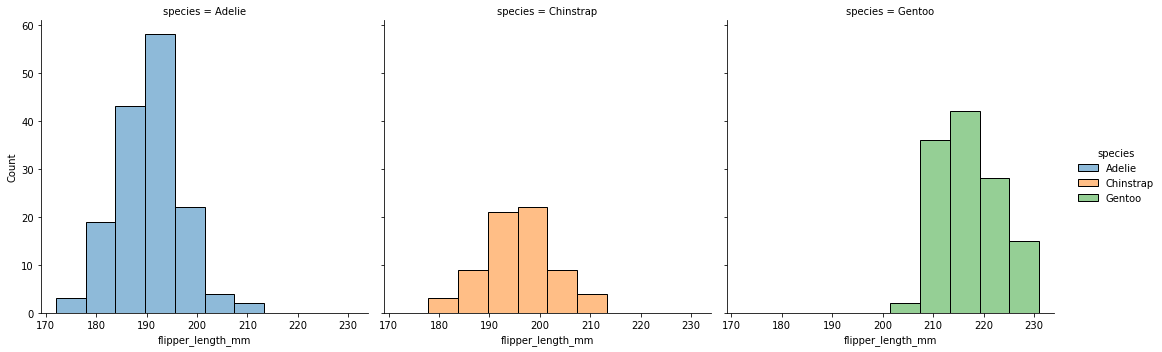

In [6]:
# Separar los histogramas en diferentes graficos
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

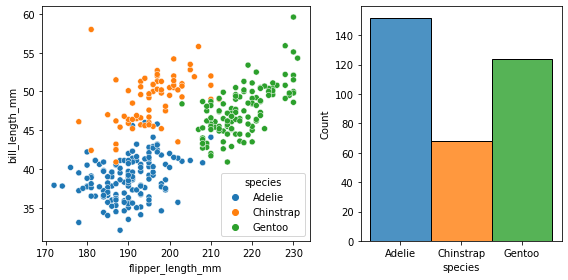

In [7]:
# Scatterplot
f, axs = plt.subplots(1,2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species', ax=axs[0])
sns.histplot(data=penguins, x='species', hue='species', alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## DATASET: Tips

In [8]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


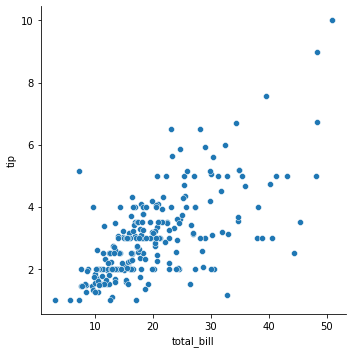

In [9]:
# grafico de puntos: total cuenta x propinas
g = sns.relplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

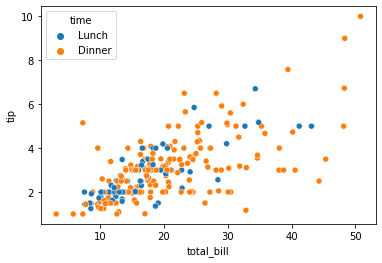

In [10]:
# scatterplot: desagregado por tiempo
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

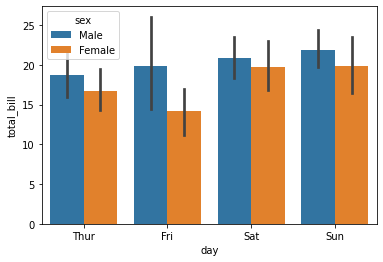

In [11]:
# grafico de barras: cuentas pagadas x dia, separado por sexo
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')

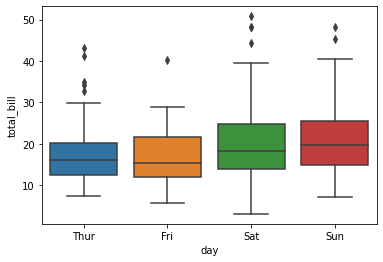

In [12]:
# boxsplot: muestra cuartiles y mediana
ax = sns.boxplot(data=tips, x='day', y='total_bill')

## DATASET: Precipitaciones
### Subgraficos

In [13]:
df_lluvias = pd.read_csv('../datasets/pune_1965_to_2002.csv')
df_lluvias.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [14]:
# usar año como indice
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


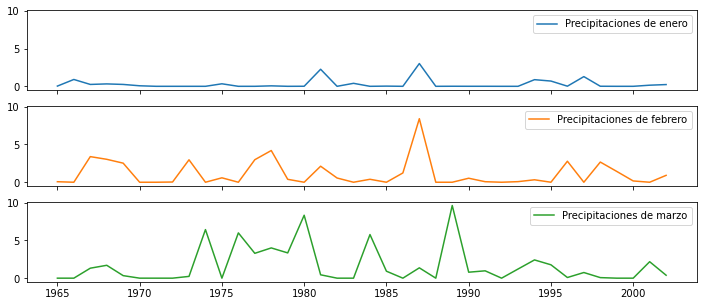

In [15]:
# subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[0].legend()

ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[1].legend()

ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax[2].legend()

## DATASET: Ejercicio

In [16]:
df_ejerc = sns.load_dataset('exercise')

In [17]:
df_ejerc = df_ejerc.drop('Unnamed: 0', axis='columns')
df_ejerc.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [18]:
df_30_min = df_ejerc[df_ejerc['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


<Figure size 432x288 with 0 Axes>

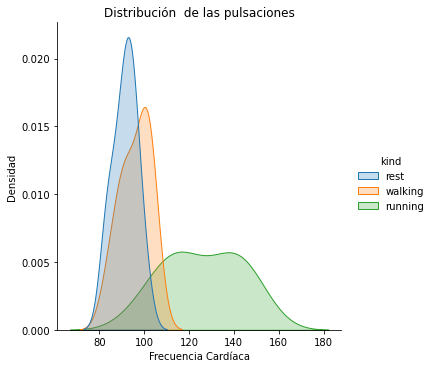

In [19]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

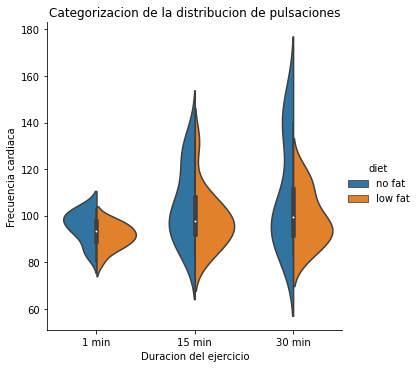

In [20]:
ax = sns.catplot(data=df_ejerc, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duracion del ejercicio', ylabel='Frecuencia cardiaca', title='Categorizacion de la distribucion de pulsaciones')

## Aprendizaje Supervisado

**PREDICE**
* Problemas de clasificación:
Necesitan predecir **la clase más probable de un elemento**, en función de un conjunto de variables de entrada. Para este tipo de algoritmos, la variable target o respuesta, **es una variable de tipo categórica**.
* Problemas de regresión:
En vez de predecir categorías, **predicen valores numéricos**. Es decir, la variable target en un problema de regresión **es de tipo cuantitativa**.

Entonces, ¿cómo sé si tengo que utilizar un algoritmo de *clasificación* o de *regresión*? Depende del tipo de problema que plantea mi variable a predecir.
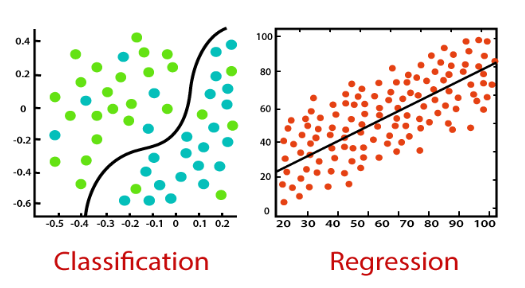
* Los algoritmos de clasificación intentan predecir una categoría.
* Planteamos la hipótesis de que podría existir algún tipo de dependencia de una variable con respecto a la otra. Si este tipo de dependencia existe, queremos ver de qué forma se da esa relación.


## Aprendizaje no supervisado

### Tipos de algoritmos no Supervisados

El aprendizaje supervisado se compone de dos grande tipos de problemas:
* **Clustering** donde se busca encontrar grupos subyacentes en los datos, con algoritmos basados en Jerarquías, Particiones, Densidad, Modelos o Grillas. 
* **Reducción de dimensionalidad** que busca encontrar pocas dimensiones como combinaciones lineales de las variables originales, con algoritmos como el PCA; ICA; t-SNE, Isomap. Análisis Factorial entre otros. 
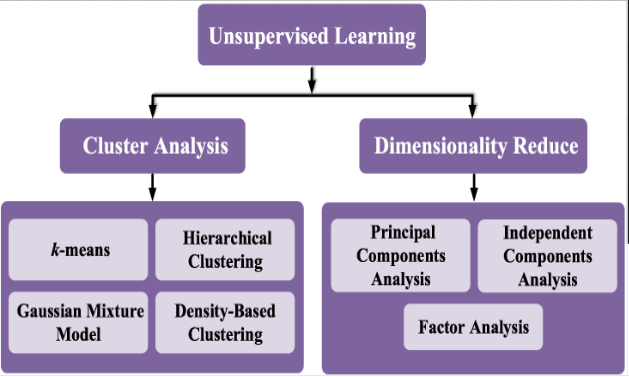

# Aprendizaje Supervisado vs No supervisado
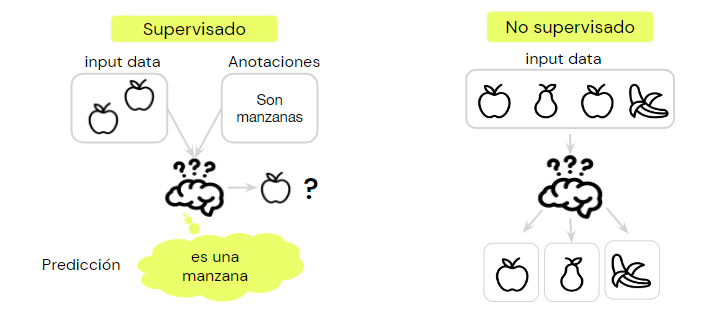

# Estadística Descriptiva
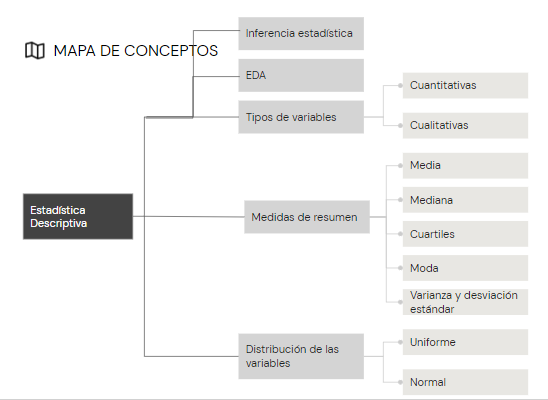

## Pasos a seguir
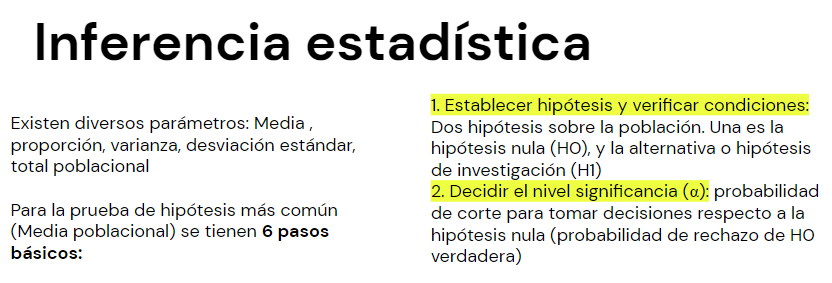
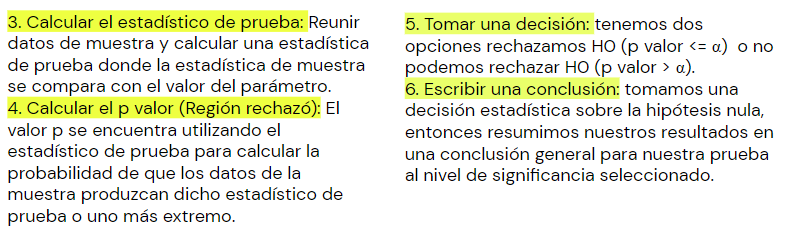

### DATASET: Datos bancarios
#### Analisis del dataset

In [21]:
bank = pd.read_csv('../datasets/bank-full.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Queremos verificar si el saldo de las cuentas de nuestros clientes ha variado respecto al valor del último año ($ 1362.27 USD)

Realizando una prueba estadistica para evaluar la hipotesis de gestion:
h0: u = 1341,12
ha: u <> 1341,12

In [24]:
bank['balance'].mean()

1362.2720576850766

In [25]:
stats.ttest_1samp(bank['balance'], popmean=1341.12)

Ttest_1sampResult(statistic=1.477137017325908, pvalue=0.13964587808442475)

Ahora nos interesa saber si las personas que tienen crédito con el banco tienen una diferencia significativa en los saldos respecto a los clientes que no tienen créditos.

In [26]:
# tienen credito
loands = bank[bank.loan == 'yes'].balance
no_loands = bank[bank.loan == 'no'].balance

In [27]:
# comparar las medias
statistic, pvalue = stats.ttest_ind(loands, no_loands, equal_var=False)
print("Estadistico:", round(statistic, 2), ' p-valor:', round(pvalue, 2))

Estadistico: -25.18  p-valor: 0.0


In [28]:
# p-valor es muy cercano a 0
pvalue

2.7640564777544156e-137

In [29]:
stats.mode([6,6,6,6,6,6,8,8,8,9,9])

ModeResult(mode=array([6]), count=array([6]))

In [30]:
# distribucion normal aleatoria
np.random.normal(size=(10, 5))

array([[ 0.03803477, -1.75520924, -0.41243859,  2.31064106,  0.5480397 ],
       [-1.02087117, -0.07806287,  0.46339614, -0.31819855,  0.45535506],
       [-0.65069519, -1.12687611,  1.10238258, -2.25746495, -0.45255703],
       [-1.89469624, -0.13798932, -0.6264737 , -0.52914519,  1.46675761],
       [ 1.42557331,  1.3125952 ,  1.23587287, -0.53312257,  1.02927925],
       [-0.68993793, -0.89245615, -0.11767575, -0.09105558,  1.56135897],
       [ 0.2615308 ,  0.11203745, -0.56165457,  0.23833229,  2.35620896],
       [-0.62462928,  0.50202747, -0.33678743, -0.70587135,  0.83398743],
       [ 0.13329513,  0.79931511, -0.23150784,  0.2962539 ,  0.21346589],
       [ 1.24765451,  0.62909023,  0.21887247,  0.24506463, -0.12722343]])

In [31]:
# media y desviacion estandar de balance
m = bank.balance.mean()
s = bank.balance.std()

In [32]:
dof = len(bank.balance)-1
confianza = 0.95

In [33]:
# valor critico
t_crit = np.abs(stats.t.ppf((1-confianza)/2, dof))
t_crit

1.960016458188857

In [34]:
# intervalo
m-s*t_crit/np.sqrt(len(bank.balance)), m+s*t_crit/np.sqrt(len(bank.balance))

(1334.205344373427, 1390.3387709967262)

# Ejercicio en clase
1. Cargar por medio de un ciclo for en un solo dataframe los precios de las siguientes acciones en la carpeta de la clase:
Dominion Energy Inc. (Símbolo: D)
Exelon Corp. (Símbolo: EXC)
NextEra Energy Inc. (Símbolo: NEE)
Southern Co. (Símbolo: SO)
Duke Energy Corp. (Símbolo: DUK)

2. Calcular volatilidad relativa por medio de la fórmula (High-Low)/Open
3. Calcular el índice de retorno por medio de la fórmula: (Close/Open)-1 
4. Graficar ambas medidas de volatilidad y determinar en qué acción se daría la mejor inversión 

In [53]:
# Ejercicio 1
df = pd.read_csv('../datasets/clase5/EXC.csv')
df['Accion'] = 'EXC'

df2 = pd.read_csv('../datasets/clase5/NEE.csv')
df2['Accion'] = 'NEE'

df3 = pd.read_csv('../datasets/clase5/SO.csv')
df3['Accion'] = 'SO'

df_completo = pd.concat([df, df2, df3])
df_completo

,Date,Open,High,Low,Close,Adj Close,Volume,Accion
0,2014-07-28,31.410000,32.130001,31.379999,31.950001,26.442406,5683400,EXC
1,2014-07-29,31.940001,32.049999,31.430000,31.469999,26.045147,6292800,EXC
2,2014-07-30,31.629999,31.660000,30.850000,31.010000,25.664442,7976600,EXC
3,2014-07-31,30.930000,31.490000,30.799999,31.080000,25.722378,9236100,EXC
4,2014-08-01,31.139999,32.080002,31.100000,31.540001,26.103081,9734300,EXC
...,...,...,...,...,...,...,...,...
1254,2019-07-22,55.400002,55.610001,54.869999,55.480000,55.480000,4623300,SO
1255,2019-07-23,55.500000,55.619999,55.009998,55.419998,55.419998,3023300,SO
1256,2019-07-24,55.459999,55.669998,55.099998,55.639999,55.639999,3613900,SO
1257,2019-07-25,55.540001,55.810001,55.250000,55.360001,55.360001,3280900,SO


In [54]:
# Ejercicio 2
df_completo['Volatilidad'] = (df_completo.High - df_completo.Low) / df_completo.Open

# Ejercicio 3
df_completo['IR'] = (df_completo.Close / df_completo.Open) - 1

In [55]:
df_completo

,Date,Open,High,Low,Close,Adj Close,Volume,Accion,Volatilidad,IR
0,2014-07-28,31.410000,32.130001,31.379999,31.950001,26.442406,5683400,EXC,0.023878,0.017192
1,2014-07-29,31.940001,32.049999,31.430000,31.469999,26.045147,6292800,EXC,0.019411,-0.014715
2,2014-07-30,31.629999,31.660000,30.850000,31.010000,25.664442,7976600,EXC,0.025609,-0.019602
3,2014-07-31,30.930000,31.490000,30.799999,31.080000,25.722378,9236100,EXC,0.022308,0.004850
4,2014-08-01,31.139999,32.080002,31.100000,31.540001,26.103081,9734300,EXC,0.031471,0.012845
...,...,...,...,...,...,...,...,...,...,...
1254,2019-07-22,55.400002,55.610001,54.869999,55.480000,55.480000,4623300,SO,0.013357,0.001444
1255,2019-07-23,55.500000,55.619999,55.009998,55.419998,55.419998,3023300,SO,0.010991,-0.001441
1256,2019-07-24,55.459999,55.669998,55.099998,55.639999,55.639999,3613900,SO,0.010278,0.003246
1257,2019-07-25,55.540001,55.810001,55.250000,55.360001,55.360001,3280900,SO,0.010083,-0.003241


<AxesSubplot:xlabel='Accion'>

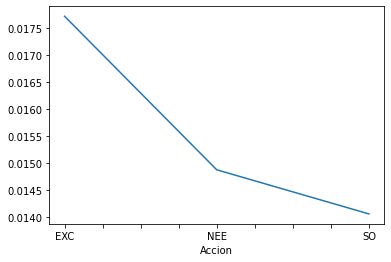

In [57]:
# Ejercicio 4
df_completo.groupby('Accion').mean().Volatilidad.plot()